# AnyoneAI - Project II

# Making Estimations with our NBA dataset

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/project2_players_df.csv")
data.dropna(subset=["PTS"], inplace=True)
import warnings
warnings.filterwarnings('ignore')


## Using Regression Models to Estimate players Salaries

### Analyzing our data

-------------- 1.1 --------------

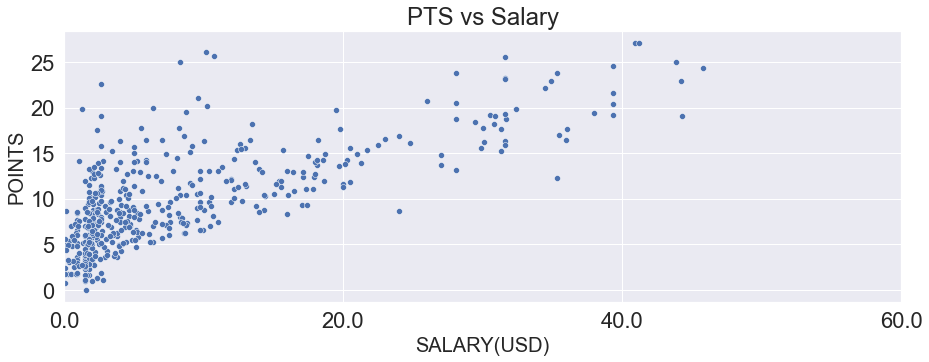

In [531]:
# Create Plot
SalaryPts = sns.scatterplot(data=data,x="Salary",y='PTS')

# Add title
SalaryPts.set_title("PTS vs Salary")

# Set salarys in millions 
plt.xticks(SalaryPts.get_xticks(),SalaryPts.get_xticks()/1000000)

# X Start in 0
plt.xlim(left=0)

# We enlarge the font and set names of axes
SalaryPts.set_ylabel("POINTS",size=20)
SalaryPts.set_xlabel("SALARY(USD)",size=20)

# we enlarge the graph
plt.figure(1).set_size_inches(15, 5)

plt.show()

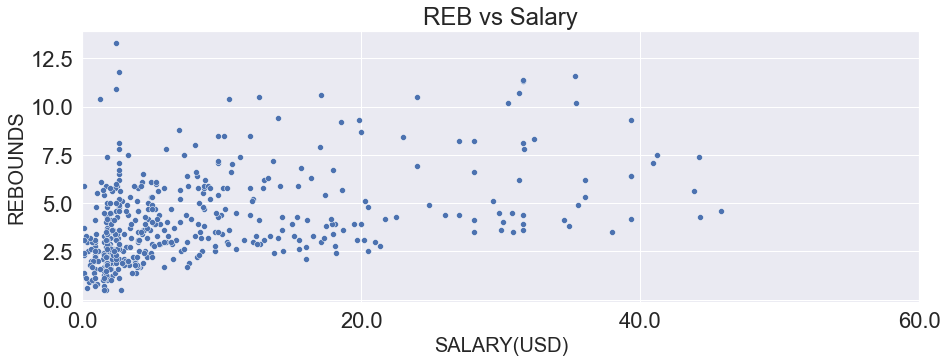

In [78]:
# Create Plot
SalaryReb = sns.scatterplot(data=data,x="Salary",y='REB')

# Add title
SalaryReb.set_title("REB vs Salary")

# Set salarys in millions 
plt.xticks(SalaryReb.get_xticks(),SalaryReb.get_xticks()/1000000)

# X Start in 0
plt.xlim(left=0)

# We enlarge the font and set names of axes
SalaryReb.set_ylabel("REBOUNDS",size=20)
SalaryReb.set_xlabel("SALARY(USD)",size=20)

# we enlarge the graph
plt.figure(1).set_size_inches(15, 5)

plt.show()

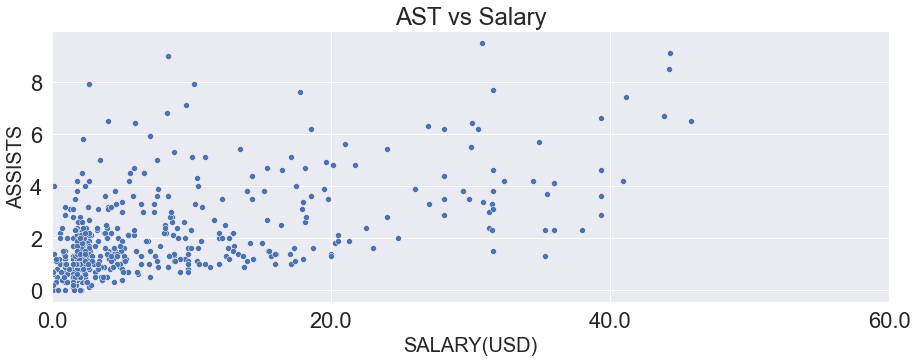

In [79]:
# Create Plot
SalaryAst = sns.scatterplot(data=data,x="Salary",y='AST')

# Add title
SalaryAst.set_title("AST vs Salary")

# Set salarys in millions 
plt.xticks(SalaryAst.get_xticks(),SalaryAst.get_xticks()/1000000)

# X Start in 0
plt.xlim(left=0)

# We enlarge the font and set names of axes
SalaryAst.set_ylabel("ASSISTS",size=20)
SalaryAst.set_xlabel("SALARY(USD)",size=20)

# we enlarge the graph
plt.figure(1).set_size_inches(15, 5)

plt.show()

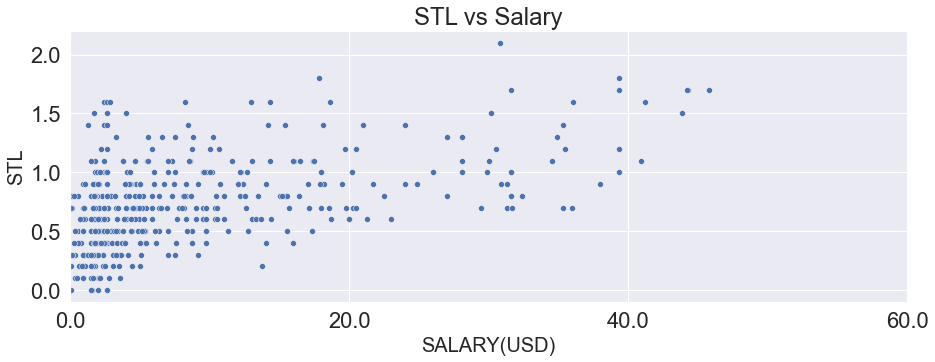

In [85]:
# Create Plot
SalarySlt = sns.scatterplot(data=data,x="Salary",y='STL')

# Add title
SalarySlt.set_title("STL vs Salary")

# Set salarys in millions 
plt.xticks(SalarySlt.get_xticks(),SalarySlt.get_xticks()/1000000)

# X Start in 0
plt.xlim(left=0)

# We enlarge the font and set names of axes
SalarySlt.set_ylabel("STL",size=20)
SalarySlt.set_xlabel("SALARY(USD)",size=20)

# we enlarge the graph
plt.figure(1).set_size_inches(15, 5)

plt.show()

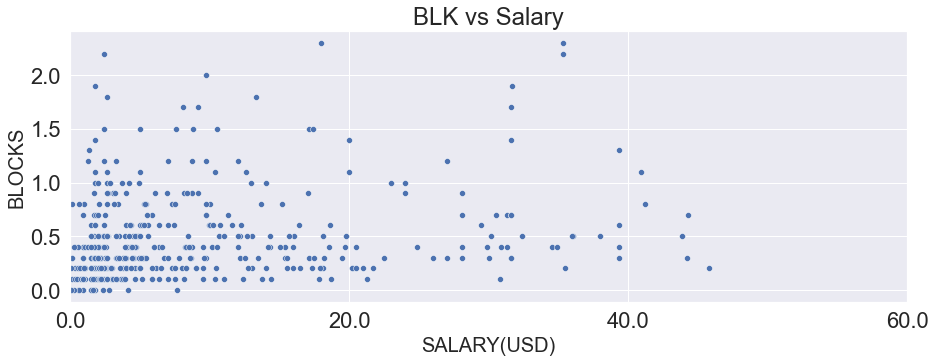

In [83]:
# Create Plot
SalaryBlk = sns.scatterplot(data=data,x="Salary",y='BLK')

# Add title
SalaryBlk.set_title("BLK vs Salary")

# Set salarys in millions 
plt.xticks(SalaryBlk.get_xticks(),SalaryBlk.get_xticks()/1000000)

# X Start in 0
plt.xlim(left=0)

# We enlarge the font and set names of axes
SalaryBlk.set_ylabel("BLOCKS",size=20)
SalaryBlk.set_xlabel("SALARY(USD)",size=20)

# we enlarge the graph
plt.figure(1).set_size_inches(15, 5)

plt.show()

-------------- 1.2 --------------

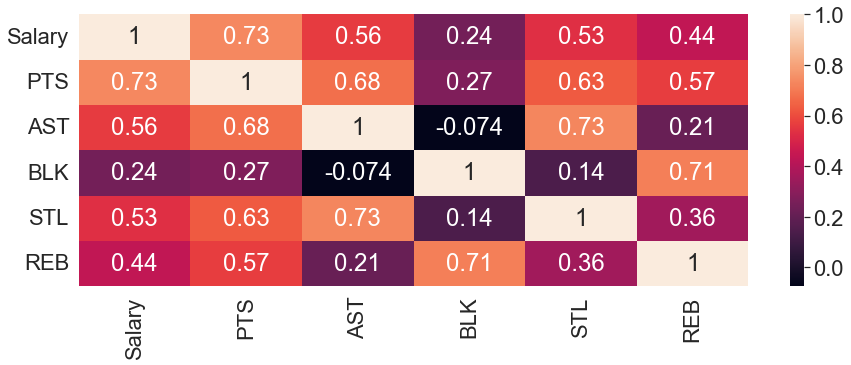

In [761]:
# Data needed to analyze
data0 = data[["Salary","PTS","AST","BLK","STL","REB"]]

# Create graph
sns.heatmap(data=data0.corr(),annot=True)

# we enlarge the graph
plt.figure(1).set_size_inches(15, 5)

"""What can we say about these distributions?"""

It is possible to observe a quite high correlation with the points and in the case of the other variables not so much.

### Splitting the Dataset

-------------- 1.3 --------------

In [145]:
"""
Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting.
Make sure to set the random state for reproducibility.

"""

"""
# Tip to understand the function
def train_test_split(data, test_size,random_state):

    np.random.seed(random_state)


    shuffled_indicies = np.random.permutation(len(data))
    test_data_size = int(len(data) * test_size)
    test_indicies = shuffled_indicies[:test_data_size]
    train_indicies = shuffled_indicies[test_data_size:]
    return data.iloc[train_indicies], data.iloc[test_indicies]

"""

# x_train = Training data.Represent 80% of the dataset except salary
# y_train = Training data.Represent 20% of the Salary from sataset
# x_test = Test data.Represent 80% of the dataset except salary
# y_test = Test data.Represent 20% of the Salary from sataset
# random_state = Adding a seed makes the random always bring us the same data
x_train , x_test, y_train , y_test = train_test_split(data.drop("Salary",axis=1),data.Salary,test_size=0.2,random_state=1)


### Baseline Model and Evaluation Metric

-------------- 1.4 --------------

In [146]:
"""
Create a Baseline model class that implements fit() and predict() methods.
As this model will not consider any other variable, the fit method should only receive a list of all players salaries. 
The predict method should receive and iterable and return a numpy array with the same length but every element should
have the same value (the average salary)

"""

class BaselineModel():
    """A baseline model that always returns the same value, the mean of the players salary in the train data"""
   
    def fit(self, y_train):
        """
        Fit the training data. 
        
        Parameters
        ----------
        y_train: Union[pd.Series, np.ndarray]
            a pandas series or numpy array containing salary information
        """

        # Create varible with mean salary
        self.meanSalary = round(y_train.mean(),2)
        
    
    def predict(self, X): 
        """
        Predict salaries 
        
        Parameters
        ----------
        X: Union[pd.DataFrame, pd.Series, np.ndarray]
            a pandas series, dataframe or numpy array with the 
            
        Returns
        -------
        np.ndarray
            a numpy array of the same length as X, with all elements equal to the mean salary calculated in fit()
        """

        # return variable multiplied by amount elemnts 
        return np.array([self.meanSalary] * len(X))
        

-------------- 1.5 --------------

In [147]:
"""
Evaluate the performance of our BaselineModel on the test 
set using mean_absolute_error from Sklearn (round the result)

"""
# Create a variable with class Baselinemodel()
Model = BaselineModel()

# Train Model 
Model.fit(y_train)

# Predict salary, use test dataset
p = Model.predict(x_test)

# calculate mean absolute error
baseline_mae = round(mean_absolute_error(p,y_test))



### Regression with a single variable

-------------- 1.6 --------------

In [148]:
"""
Select the variable you think would provide the best fit. 
Perform feature scaling on this variable using a Sklearn scaler.

"""
"""
WHY USE MinMaxScaler?

Because the graph is not Gaussian and there are no outliers.

# Graph
sns.histplot(data=x_train.PTS)
plt.show()

"""

# add scaler at in variable
scaler = MinMaxScaler()

# we normalize the points column in x_train and x_test 
x_train.PTS = scaler.fit_transform(x_train.PTS.values.reshape(-1,1))
x_test.PTS = scaler.transform(x_test.PTS.values.reshape(-1,1))



-------------- 1.7 --------------

In [317]:
"""
Train a model with [SGDRegressor] from Sklearn using the default parameters. Evaluate the model's 
performance on the test set using the selected metric.

"""

# Create model
Model_SDGR = SGDRegressor(random_state=1)

# Train the model
Model_SDGR.fit(x_train.PTS.values.reshape(-1,1),y_train)

# Create predict from the model
Model_SDGR_Predict = Model_SDGR.predict(x_test.PTS.values.reshape(-1,1))

# calculate mean absolute error
default_mae = mean_absolute_error(Model_SDGR_Predict,y_test)



-------------- 1.8 --------------

In [150]:
"""
Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: 
epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set,
then save the results of each hyperparameter combination, finally select 
the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

"""

# Define the fuction
def search_best_hyperparameters(max_iter, eta0):

    # Inicialize varibles
    Model = 0
    Model_Predict = 0
    MinForIteration = []
    Mae = 0

    # We iterate the list of max_iter
    for i in max_iter:
        
        # We iterate the list of eta0
        for j in eta0:
            
            # Create model
            Model = SGDRegressor(random_state=1,eta0=j,max_iter=i)

            # Train model
            Model.fit(x_train.PTS.values.reshape(-1,1),y_train)

            # Create predict from the model
            Model_Predict = Model.predict(x_test.PTS.values.reshape(-1,1))

            # Calculate mean absolute error
            Mae = mean_absolute_error(Model_Predict,y_test)

            # Add Mae to list
            MinForIteration.append(np.min(Mae))
    
    result = {
        "hyperparameters": {"max_iter": max_iter, "eta0": eta0}, 
        "mae": abs(min(MinForIteration)) # Select min Mae from MinForIteration
    }

   
    # Return the best MAE
    return result

In [151]:
# Example list of hyperparameters values
max_iter = [1000, 1000000]
eta0 = [0.0001, 0.001, 0.01, 0.1]

# Call fuction
result1 = search_best_hyperparameters(max_iter, eta0)

# Map variable with mae result
best_mae = result1["mae"]

C:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [152]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {default_mae}")
print(f"Best SGDRegressor: {best_mae}")

Mean Absolute Error for each model:
Baseline: 8012499
Default SGDRegressor: 4764975.283933298
Best SGDRegressor: 4746859.990901697


### Multivariate Linear Regression

-------------- 1.10 --------------

In [246]:
"""
Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index):
["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "SALARY"]

"""
# Create a copy of the dataset 
data2 = data[["PERSON_ID","TEAM_NAME","PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "Salary"]].copy()

# Set index
data2 = data2.set_index("PERSON_ID")

#### Feature Engineering

-------------- 1.11 --------------

In [247]:
"""
Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years,
but second round players and undrafted players don't have guaranteed contracts. 
So we're gonna divide the bins like this:

"""

# Replace "undrafted" by 0 
data2.DRAFT_NUMBER = data2.DRAFT_NUMBER.replace("Undrafted",0)

# Fill nan
data2["DRAFT_NUMBER"] = data2["DRAFT_NUMBER"].fillna(0)

# Tranform column to int
data2["DRAFT_NUMBER"] = data2["DRAFT_NUMBER"].apply(float).apply(int)

# Create containers 
data2["DRAFT"] = pd.cut(data2.DRAFT_NUMBER,bins=[1,15,30,60],labels=["firstround_lottery","firstround_non_lottery","Second_round"])

# Transform colum to str
data2["DRAFT"] = data2["DRAFT"].astype(str)

# Replace nan values by undrafted
data2["DRAFT"] = data2["DRAFT"].replace("nan","undrafted")



In [248]:
# Delete column Draft
data2 = data2.drop(["DRAFT_NUMBER"],axis=1)


-------------- 1.12 --------------

In [249]:
"""
Encode the categorical features: DRAFT, POSITION and TEAM_NAME

"""

# Categorical Encoding with sklearn, in this case use sklearn because they were ordinal values.
le = LabelEncoder()
data2["DRAFT"] = le.fit_transform(data2["DRAFT"])

# Categorical Encoding with pandas
data2 = pd.get_dummies(data2,columns=["POSITION"])

# Categorical Encoding with pandas
data2 = pd.get_dummies(data2,columns=["TEAM_NAME"])



#### Modeling

-------------- 1.13 --------------

In [250]:
"""
Split the dataset into train and test

"""

# x_train = Training data.Represent 80% of the dataset except salary
# y_train = Training data.Represent 20% of the Salary from sataset
# x_test = Test data.Represent 80% of the dataset except salary
# y_test = Test data.Represent 20% of the Salary from sataset
# random_state = Adding a seed makes the random always bring us the same data
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(data2.drop("Salary",axis=1),data2.Salary,test_size=0.2,random_state=1)



-------------- 1.14 --------------

In [389]:
"""
Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number

"""
# add scaler at in variable
scaler = MinMaxScaler()

# Create list with features
li = ["PTS", "REB", "AST", "BLK", "SEASON_EXP"]

# Train and tranform 
x_train2[li] = scaler.fit_transform(x_train2[li])
x_test2[li] = scaler.transform(x_test2[li])


-------------- 1.15 --------------

In [315]:
"""
Write a function to train a SGDRegressor model with the new dataset, 
trying different hyperparameters, and selecting the one that performs the best.

"""
# Define the fuction
def best_model():

   # Create model with the hyperparameters effective
   model = SGDRegressor(random_state=1,max_iter=1000,alpha=0.0001,power_t=0.29)
   
   # Train the model
   fit_model = model.fit(x_train2,y_train2)
   
   # Predict values 
   model_predict = fit_model.predict(x_test2)
   
   # Return mean absolute error 
   return mean_absolute_error(model_predict,y_test2)

# call fuction
default_best_model = best_model()



-------------- 1.16 --------------


How did the model performed compared to our univariate models?

Compared to models with a variable, the multivarible showed a higher error.


### DecisionTreeRegressor





-------------- 1.17 --------------

In [313]:
"""
Create new model using [DecisionTreeRegressor] from scikit learn. 
We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. 
Read the documentation to get a better grasp of what each one does.

"""

# List of hyperparameter example values
max_depth = [5, 10, 15, 20, 50]
min_samples_leaf = [2, 10, 20, 50]
max_features = [5, 10]

# Define the fuction
def DTR(max_depth,min_samples_leaf,max_features):

    # inicialize variable
    list_error = []

    # We go through the list of max_depth
    for md in max_depth:
     
        # We go through the list of min_samples_leaf
        for msf in min_samples_leaf:
         
            # We go through the list of max_features
            for mf in max_features:
                
                # Create model
                model = DecisionTreeRegressor(random_state=1,max_depth=md,min_samples_leaf=msf,max_features=mf)
                
                # Train model
                model_train = model.fit(x_train2,y_train2)
                
                # Calculate predict
                model_predict = model_train.predict(x_test2)
                
                # Add mean absolute error to list
                list_error.append([mean_absolute_error(model_predict,y_test2),md,msf,mf])
    
    # Return result
    return ("Best Decision Tree Model: ",round(min(list_error)[0],1),
                " - Max_depth: ",min(list_error)[1],
                " - Min_sampls_leaf: ",min(list_error)[2],
                " - Max_features: ",min(list_error)[3])

# Call the fuction DTR
Best_decision_tree_model =  DTR(max_depth,min_samples_leaf,max_features)


-------------- 1.18 --------------

In [312]:
"""
Compare the results obtained with the best decision tree model against the baseline,
default and the best params sgd regressors-

"""
# Results
print("Baseline model: " , baseline_mae)
print("default SGDregressor: ",default_best_model)
print("Best decision tree model: " , Best_decision_tree_model)


Baseline model:  8012499
default SGDregressor:  4836545.202019371
Best decision tree model:  ('Best Decision Tree Model: ', 4065357.0, ' - Max_depth: ', 10, ' - Min_sampls_leaf: ', 10, ' - Max_features: ', 10)


### Analyzing our results

-------------- 1.19 --------------

In this case, the non-linear model turned out better, as it is more accurate with respect to the error. the main cause in my opinion is that the decision tree works better the low correlation between the variable, so tango returns a smaller error.

-------------- 1.20 --------------


It can be seen that the error when applying the SGDRegressor with a single variable is lower than the model of multiples variables, this happens because when a single variable is applied, the variable with greater positive correlation is used, while when multiple variables are applied the correlation varies.One way to improve our model would be to select the variables with the highest correlation.

## Star or no Star? Predicting players All-NBA selections

### Analyzing the data

-------------- 2.1 --------------

In [120]:
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)

In [121]:
"""
Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:

number of rows
number of seasons
number of unique players
number of all-nba selections vs non selected

"""

# Variables
print("\nNumber Of Row: " , len(all_nba_df))
print("\nNumber Of season: " , len(all_nba_df.season.unique()))
print("\nNumber Of Unique Players: " , len(all_nba_df.player_id.unique()))
print("\nNumber Of All Nba:\n" , all_nba_df.all_nba.value_counts())


Number Of Row:  14825

Number Of season:  39

Number Of Unique Players:  2718

Number Of All Nba:
 0    14329
1      496
Name: all_nba, dtype: int64


### Splitting the dataset

-------------- 2.2 --------------    

In [141]:
"""
Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'

"""

# Select columns
all_nba_df1 = all_nba_df[['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba']]
       
# x_train3 80% of the dataset
# x_test3  80% of the dataset
# y_train3 20% of the dataset
# y_test3  20% of the dataset
x_train3 , x_test3 , y_train3, y_test3 = train_test_split(all_nba_df1.drop("all_nba",axis=1),all_nba_df1.all_nba,random_state=1)


### Baseline model and Evaluation Metrics

-------------- 2.3 --------------    


Let's start with a simple test.What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

The precision would be very high because there are more unselected players than selected.

-------------- 2.4 --------------    




What does this tells us about the data and the use of accuracy as an evaluation metric?

The data is not balanced, so accuracy would not be a good evaluation metric.

-------------- 2.5 --------------

In [96]:
"""
Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place)

"""

# Select columns to number
x_train3_num = x_train3.select_dtypes(include='number')
x_test3_num = x_test3.select_dtypes(include="number")

# Create scaler
scaler = MinMaxScaler()

# Create list with columns
li = ['games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc',
      '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

# Scaling dataset
x_train3_num[li] = scaler.fit_transform(x_train3_num[li])
x_test3_num[li] = scaler.transform(x_test3_num[li])



-------------- 2.6 --------------

In [99]:
"""
Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

"""
    
# Create model
Model = LogisticRegression(random_state=42)

# Train model
train = Model.fit(x_train3_num,y_train3)


-------------- 2.7 --------------

In [100]:
"""
 Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

"""

# Print metrics
print("F1: " , f1_score(y_test3,train.predict(x_test3_num)))
print("Precision: " , precision_score(y_test3,train.predict(x_test3_num)))
print("Accuracy: " , accuracy_score(y_test3,train.predict(x_test3_num)))
print("Recall: " , recall_score(y_test3,train.predict(x_test3_num)))

F1:  0.6633663366336633
Precision:  0.9436619718309859
Accuracy:  0.9816563258699758
Recall:  0.5114503816793893


### Classification

#### Feature engineering

-------------- 2.8 --------------    

In [142]:
"""
One hot encode the Team feature. Make sure to drop the original column.

"""

# One hot encode with pandas
x_train3 =  pd.get_dummies(x_train3,columns=["team"])
x_test3 =  pd.get_dummies(x_test3,columns=["team"])


#### Modeling

-------------- 2.9 --------------    

In [353]:
"""
Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. 
Remember to select based on f1 score, but report also precision and recall. 
Save the best performing model to use in the next steps.

"""

max_iter = [100,1000,10000,100000]
C = [0.8,0.6,0.5,0.3]
tols = [0.1,0.01,0.001,0.0001]

def best_logistic_regression(max_iter,C,tols,Y_test_predict,X_test_predict,metric):

    # Create list
    li_f1 = []

    for mi in max_iter:
        for c in C:
            for t in tols:
                model = LogisticRegression(max_iter=mi,C=c,tol=t,random_state=42)
                model_fit = model.fit(x_train3,y_train3)
                element = metric(model_fit.predict(X_test_predict),Y_test_predict)
                li_f1.append([element,mi,c,t])

    return min(li_f1)


In [354]:
best_logistic_regression(max_iter,C,tols,y_test3,x_test3,f1_score)

[0.7241379310344827, 100, 0.5, 0.0001]

#### Evaluating on New Data

-------------- 2.10 --------------    

In [360]:
"""
Load the dataset all_nba_2018_dataset.csv in one dataframe and all_nba_2018_selections.csv) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction,
      you can keep them but remember not to pass them to the classifier.

    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, 
      but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different
      team names in this dataset (with all values in 0) to make the classifier work.

"""
# Read csv
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)


####################################################### SCALING ####################################################################

# Select column with numbers
all_nba_2018_df1 = all_nba_2018_df.drop(["season_id","player_id","player_season","player_season","season_start"],axis=1)

# Create list with columns
li = ["games","gamesstarted","mp","fg_perc","3p_perc","2p_perc","ft_perc","trb","ast","stl","blk","tov","pf","pts"]

# Create scaler
scaler = MinMaxScaler()

# Apply the scaled 
all_nba_2018_df1[li] = scaler.fit_transform(all_nba_2018_df1[li])

####################################################### ONE HOT ####################################################################

# Create list
list_teams = []

# we 
for i in all_nba_df.team.unique():
    if i not in all_nba_2018_df1.team.unique():
       all_nba_2018_df1 = all_nba_2018_df1.append({"team" : i}, ignore_index=True)
       all_nba_2018_selections = all_nba_2018_selections.append({"all_nba": 0},ignore_index=True)

all_nba_2018_df1 = all_nba_2018_df1.fillna(0)
all_nba_2018_df1 =pd.get_dummies(all_nba_2018_df1,columns=["team"])



2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [362]:
best_logistic_regression(max_iter,C,tols,all_nba_2018_selections.all_nba,all_nba_2018_df1.drop(["player","season"],axis=1),recall_score)

[0.0, 100, 0.3, 0.0001]

2.12. Analyze the results, what do you think it is happening?

#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions+
    - Players in our predictions not selected 

2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [ ]:
class AllNbaSingleSeasonClassifier():
    def __init__(self, model):
        """
        Class constructor
        
        Parameters
        ----------
        model: BaseEstimator
            a Scikit learn estimator
        """
        self._model = model
        
    def predict(X):
        """
        Predicts all nba selections. This classifier will limit the number
        of positive instances to 15
        
        Parameters
        ----------
        X: pd.DataFrame
            a dataframe with the players data
            
        Returns
        -------
        np.ndarray
            An array of the same length as y, with 15 true results based on the players with most probabilities of
            beign selected
        """

        

2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

2.19. What do you think we could do to improve our model?

### Optional: Oversampling

2.19. Read about oversampling techniques, for example [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). Use this strategy to create synthetic data and retrain our model. Compare the results. 

## Optional: Developing a Linear Regressor class from scratch

Our last task will be to code a Linear Regression algorithm using Gradient Descent as its optimization algorithm in Python. The structure of the class is presented below, you should use numpy for numerical computation.

3.1. Write a LinearRegression class that implements fit and predict methods, and uses gradient descent as optimization algorithm

In [ ]:
    
class LinearRegressor:
    """Linear regression algorithm class. Implements gradient descent as optimization algorithm"""
    
    def __init__(self, epochs: int, learning_rate: float):
        """
        Class constructor
        
        Parameters
        ----------
        epochs: int
            number of epochs to run gradient descent
        learning_rate: float
            rate of update of the gradients
        """


    def _gradient_descent():
        """
        Gradient descent algorithm
        """


    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        
        Parameters
        ----------
        X: np.ndarray
        y: np.ndarray
        """
             
    def predict(self, X):
        """
        Predict
        
        Parameters
        ----------
        X: np.ndarray
        
        Returns
        -------
        np.ndarray
            array with predictions
        """


3.2. Train a regression model with the data from the first section to calculate players salaries using points per game. Try with a few different values (3 or 4 for each should suffice) for epochs and learning rate parameters, calculate MAE for all results and save the best result along with the parameters values used.

3.3. Evaluate the model performance on the test set, and compare with the result you obtained using SGDRegressor from scikit-learn.